### Test OOPNET

In [19]:
import oopnet as on
network = on.Network()

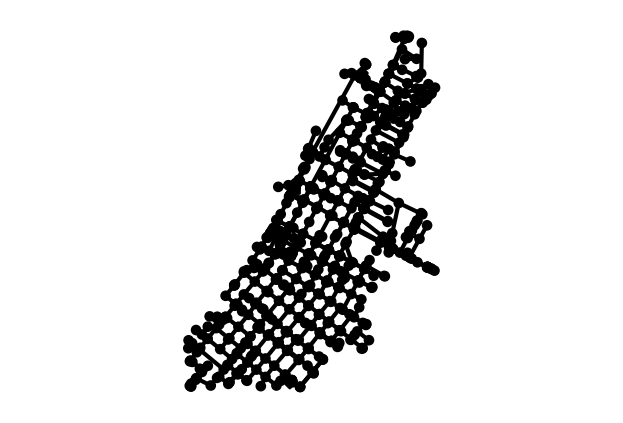

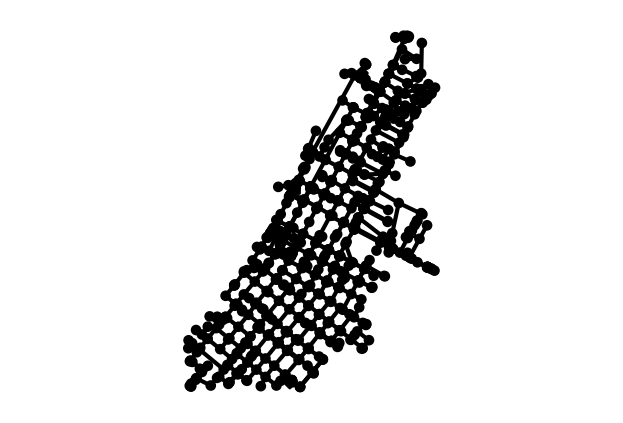

In [20]:
filename = "ky1.inp"
network = on.Network.read(filename)

network.plot()

In [ ]:
import pandas as pd

In [145]:
default_elevation = 0
default_demand = 0

In [146]:
def convert_oopnet_junctions_to_df(net):
    # Get the junctions and add them to a pandas dataframe.
    df = pd.DataFrame(columns=["node","xcoord","ycoord","elevation","demand"])
    for j in on.get_junctions(net):
        df = pd.concat([df,pd.DataFrame([{"node":j.id,"xcoord":j.xcoordinate,"ycoord":j.ycoordinate,"elevation":j.elevation,"demand":j.demand}])])

    df = df.reset_index(drop=True)
    return df
def convert_oopnet_nodes_to_df(net):
    # Get the junctions and add them to a pandas dataframe.
    df = pd.DataFrame(columns=["node","xcoord","ycoord"])
    for j in on.get_nodes(net):
        df = pd.concat([df,pd.DataFrame([{"node":j.id,
                                          "xcoord":j.xcoordinate,"ycoord":j.ycoordinate,
                                          "elevation":default_elevation,"demand":default_demand}])])

    df = df.reset_index(drop=True)
    return df

In [147]:
def convert_oopnet_pipes_to_df(net):
    df = pd.DataFrame(columns=["id","node1","node2","length","diameter","roughness","minorloss","status"])
    #;ID Node1 Node2 Length Diameter Roughness MinorLoss Status
    for j in on.get_pipes(net):
        new_row = pd.DataFrame(
            [{"id":j.id,"node1":j.startnode.id,"node2":j.endnode.id,
              "length":j.length,"diameter":j.diameter,
              "roughness":j.roughness,"minorloss":j.minorloss,"status":j.status}])
        df = pd.concat([df,new_row])
    
    df = df.reset_index(drop=True)
    return df

In [155]:
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)

In [286]:
nodes = convert_oopnet_nodes_to_df(network)
junctions = convert_oopnet_junctions_to_df(network)
nodes = nodes.merge(junctions,on='node',how='outer')
drop_y(nodes)
rename_x(nodes)
nodes

,node,xcoord,ycoord,elevation,demand
0,J-1,4389474.53,3834988.00,0.0,0.0
1,J-2,4389026.72,3834207.00,0.0,0.0
2,J-3,4389734.41,3835428.00,0.0,0.0
3,J-4,4389551.27,3835089.00,0.0,0.0
4,J-5,4390452.76,3836810.00,0.0,0.0
...,...,...,...,...,...
854,I-Pump-2,4389909.61,3836728.00,0.0,0.0
855,O-Pump-2,4389909.61,3836728.00,0.0,0.0
856,T-5,4392183.93,3840660.56,0.0,0.0
857,T-1,4389737.79,3830153.17,0.0,0.0


In [287]:
edges = convert_oopnet_pipes_to_df(network)
edges

,id,node1,node2,length,diameter,roughness,minorloss,status
0,P-1,J-1,J-2,274.685760,914.4,100.0,0.0,OPEN
1,P-2,J-3,J-4,117.591535,914.4,100.0,0.0,OPEN
2,P-3,J-5,J-6,155.417215,914.4,100.0,0.0,OPEN
3,P-4,J-7,J-3,286.999375,914.4,100.0,0.0,OPEN
4,P-5,J-8,J-1,38.404800,914.4,100.0,0.0,OPEN
...,...,...,...,...,...,...,...,...
979,P-3751,J-3348,J-3349,3.779215,508.0,100.0,0.0,OPEN
980,P-3752,J-116,J-3348,0.030480,203.2,100.0,0.0,OPEN
981,P-3753,J-3349,J-103,4.754880,508.0,100.0,0.0,OPEN
982,P-3680,T-5,J-486,5.913120,508.0,100.0,0.0,OPEN


In [174]:
nodes['node']

0           J-1
1           J-2
2           J-3
3           J-4
4           J-5
         ...   
854    I-Pump-2
855    O-Pump-2
856         T-5
857         T-1
858         R-1
Name: node, Length: 859, dtype: object

In [175]:
edges.head()

,id,node1,node2,length,diameter,roughness,minorloss,status
0,P-1,J-1,J-2,274.685760,914.4,100.0,0.0,OPEN
1,P-2,J-3,J-4,117.591535,914.4,100.0,0.0,OPEN
2,P-3,J-5,J-6,155.417215,914.4,100.0,0.0,OPEN
3,P-4,J-7,J-3,286.999375,914.4,100.0,0.0,OPEN
4,P-5,J-8,J-1,38.404800,914.4,100.0,0.0,OPEN


In [130]:
#edges = edges.drop(edges[~edges['node1'].isin(nodes['node'])].index)

In [131]:
#edges = edges.drop(edges[~edges['node2'].isin(nodes['node'])].index)

In [288]:
edges

,id,node1,node2,length,diameter,roughness,minorloss,status
0,P-1,J-1,J-2,274.685760,914.4,100.0,0.0,OPEN
1,P-2,J-3,J-4,117.591535,914.4,100.0,0.0,OPEN
2,P-3,J-5,J-6,155.417215,914.4,100.0,0.0,OPEN
3,P-4,J-7,J-3,286.999375,914.4,100.0,0.0,OPEN
4,P-5,J-8,J-1,38.404800,914.4,100.0,0.0,OPEN
...,...,...,...,...,...,...,...,...
979,P-3751,J-3348,J-3349,3.779215,508.0,100.0,0.0,OPEN
980,P-3752,J-116,J-3348,0.030480,203.2,100.0,0.0,OPEN
981,P-3753,J-3349,J-103,4.754880,508.0,100.0,0.0,OPEN
982,P-3680,T-5,J-486,5.913120,508.0,100.0,0.0,OPEN


In [296]:
edges[(edges["node1"]=='J-71') & (edges["node2"] == 'T-1')]

,id,node1,node2,length,diameter,roughness,minorloss,status


In [297]:
import networkx as nx
G = nx.from_pandas_edgelist(edges, 'node1', 'node2',
                            edge_attr=["length", "diameter","roughness"],
                            create_using=nx.DiGraph())

In [303]:
G.edges('J-71')

OutEdgeDataView([('J-71', 'J-72'), ('J-71', 'J-380')])

In [300]:
nx.set_node_attributes(G, nodes[['xcoord','node']].set_index('node',drop=True)['xcoord'].to_dict(), 'xcoord')
nx.set_node_attributes(G, nodes[['ycoord','node']].set_index('node',drop=True)['ycoord'].to_dict(), 'ycoord')
nx.set_node_attributes(G, nodes[['demand','node']].set_index('node',drop=True)['demand'].to_dict(), 'demand')
nx.set_node_attributes(G, nodes[['elevation','node']].set_index('node',drop=True)['elevation'].to_dict(), 'elevation')

In [301]:
edges

,id,node1,node2,length,diameter,roughness,minorloss,status
0,P-1,J-1,J-2,274.685760,914.4,100.0,0.0,OPEN
1,P-2,J-3,J-4,117.591535,914.4,100.0,0.0,OPEN
2,P-3,J-5,J-6,155.417215,914.4,100.0,0.0,OPEN
3,P-4,J-7,J-3,286.999375,914.4,100.0,0.0,OPEN
4,P-5,J-8,J-1,38.404800,914.4,100.0,0.0,OPEN
...,...,...,...,...,...,...,...,...
979,P-3751,J-3348,J-3349,3.779215,508.0,100.0,0.0,OPEN
980,P-3752,J-116,J-3348,0.030480,203.2,100.0,0.0,OPEN
981,P-3753,J-3349,J-103,4.754880,508.0,100.0,0.0,OPEN
982,P-3680,T-5,J-486,5.913120,508.0,100.0,0.0,OPEN


In [304]:
import plotly.graph_objects as go
edge_x = []
edge_y = []
for edge in G.edges():
    x0 = G.nodes[edge[0]]['xcoord']
    y0 = G.nodes[edge[0]]['ycoord']
    x1 = G.nodes[edge[1]]['xcoord']
    y1 = G.nodes[edge[1]]['ycoord']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x = G.nodes[node]['xcoord']
    y = G.nodes[node]['ycoord']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [305]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

### Find shortest paths 
###### According to the formula in the paper

In [306]:
bb = nx.edge_betweenness_centrality(G, normalized=True)

In [270]:
new_edges.loc[new_edges[(edges["node1"]==s) & (edges["node2"]==t)].index,"bce"] = 0.545

In [275]:
edges

,id,node1,node2,length,diameter,roughness,minorloss,status,length_x0.5,diameter_x0.5,roughness_x0.5
0,P-1,J-1,J-2,274.685760,914.4,100.0,0.0,OPEN,137.342880,457.2,50.0
1,P-2,J-3,J-4,117.591535,914.4,100.0,0.0,OPEN,58.795768,457.2,50.0
2,P-3,J-5,J-6,155.417215,914.4,100.0,0.0,OPEN,77.708608,457.2,50.0
3,P-4,J-7,J-3,286.999375,914.4,100.0,0.0,OPEN,143.499688,457.2,50.0
4,P-5,J-8,J-1,38.404800,914.4,100.0,0.0,OPEN,19.202400,457.2,50.0
...,...,...,...,...,...,...,...,...,...,...,...
979,P-3751,J-3348,J-3349,3.779215,508.0,100.0,0.0,OPEN,1.889608,254.0,50.0
980,P-3752,J-116,J-3348,0.030480,203.2,100.0,0.0,OPEN,0.015240,101.6,50.0
981,P-3753,J-3349,J-103,4.754880,508.0,100.0,0.0,OPEN,2.377440,254.0,50.0
982,P-3680,T-5,J-486,5.913120,508.0,100.0,0.0,OPEN,2.956560,254.0,50.0


In [308]:
new_edges = edges.copy()
new_edges["bce"] = 0
for s, t in bb.keys():
    new_edges.loc[new_edges[(edges["node1"]==s) & (edges["node2"] == t)].index,"bce"] = bb[(s,t)]

In [310]:
edges = new_edges
edges

,id,node1,node2,length,diameter,roughness,minorloss,status,bce
0,P-1,J-1,J-2,274.685760,914.4,100.0,0.0,OPEN,0.000004
1,P-2,J-3,J-4,117.591535,914.4,100.0,0.0,OPEN,0.000004
2,P-3,J-5,J-6,155.417215,914.4,100.0,0.0,OPEN,0.000001
3,P-4,J-7,J-3,286.999375,914.4,100.0,0.0,OPEN,0.000005
4,P-5,J-8,J-1,38.404800,914.4,100.0,0.0,OPEN,0.000062
...,...,...,...,...,...,...,...,...,...
979,P-3751,J-3348,J-3349,3.779215,508.0,100.0,0.0,OPEN,0.000073
980,P-3752,J-116,J-3348,0.030480,203.2,100.0,0.0,OPEN,0.000019
981,P-3753,J-3349,J-103,4.754880,508.0,100.0,0.0,OPEN,0.000079
982,P-3680,T-5,J-486,5.913120,508.0,100.0,0.0,OPEN,0.000001


In [277]:
## Go through all edges in dataframe

### For each edge 'e'

#### Go through all other edges 

##### 

In [311]:
def get_pipe_info(s,t):
    return edges[(edges["node1"]==s) & (edges["node2"] == t)]

#### Create weighted length and diameters

In [312]:
A,B = 0.2, 0.6

In [313]:
edges['length_x0.5'] = edges['length'] / 2
edges['diameter_x0.5'] = edges['diameter'] / 2
edges['Z'] = edges['length_x0.5'] + edges['diameter_x0.5']
edges.head()

,id,node1,node2,length,diameter,roughness,minorloss,status,bce,length_x0.5,diameter_x0.5,Z
0,P-1,J-1,J-2,274.685760,914.4,100.0,0.0,OPEN,0.000004,137.342880,457.2,594.542880
1,P-2,J-3,J-4,117.591535,914.4,100.0,0.0,OPEN,0.000004,58.795768,457.2,515.995768
2,P-3,J-5,J-6,155.417215,914.4,100.0,0.0,OPEN,0.000001,77.708608,457.2,534.908608
3,P-4,J-7,J-3,286.999375,914.4,100.0,0.0,OPEN,0.000005,143.499688,457.2,600.699688
4,P-5,J-8,J-1,38.404800,914.4,100.0,0.0,OPEN,0.000062,19.202400,457.2,476.402400


In [314]:
# A*Ci + B*Z

In [315]:
edges['weight'] = A * edges['bce'] + B * edges["Z"]


,id,node1,node2,length,diameter,roughness,minorloss,status,bce,length_x0.5,diameter_x0.5,Z,weight
0,P-1,J-1,J-2,274.685760,914.4,100.0,0.0,OPEN,0.000004,137.342880,457.2,594.542880,356.725729
1,P-2,J-3,J-4,117.591535,914.4,100.0,0.0,OPEN,0.000004,58.795768,457.2,515.995768,309.597461
2,P-3,J-5,J-6,155.417215,914.4,100.0,0.0,OPEN,0.000001,77.708608,457.2,534.908608,320.945165
3,P-4,J-7,J-3,286.999375,914.4,100.0,0.0,OPEN,0.000005,143.499688,457.2,600.699688,360.419814
4,P-5,J-8,J-1,38.404800,914.4,100.0,0.0,OPEN,0.000062,19.202400,457.2,476.402400,285.841452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,P-3751,J-3348,J-3349,3.779215,508.0,100.0,0.0,OPEN,0.000073,1.889608,254.0,255.889608,153.533779
980,P-3752,J-116,J-3348,0.030480,203.2,100.0,0.0,OPEN,0.000019,0.015240,101.6,101.615240,60.969148
981,P-3753,J-3349,J-103,4.754880,508.0,100.0,0.0,OPEN,0.000079,2.377440,254.0,256.377440,153.826480
982,P-3680,T-5,J-486,5.913120,508.0,100.0,0.0,OPEN,0.000001,2.956560,254.0,256.956560,154.173936


In [ ]:
import numpy as np
zero_p = 0.4
edges['rnd'] = np.random.choice([0, 1], size=edges.shape[0], p=[zero_p, 1-zero_p])

In [ ]:
edges

#### Finding Minimum eigen value

In [316]:
L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.toarray())
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()

NetworkXNotImplemented: not implemented for directed type